In [118]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import truvari

In [2]:
var_stats, gt_stats = joblib.load("../data/pvcf_stats.jl")

In [53]:
s_metadata = pd.read_csv("../../metadata/sample_metadata.txt", sep='\t')
i_metadata=pd.read_csv("../../metadata/individual_metadata.txt", sep='\t')

In [54]:
s_metadata.set_index("individual", inplace=True)
i_metadata.set_index("Individual", inplace=True)
metadata = s_metadata.join(i_metadata)

In [ ]:
metadata.set_index('sample', inplace=True)
gt_stats['project'] = gt_stats['sample'].map(metadata['project'])

In [73]:
gt_stats['population'] = gt_stats['sample'].map(metadata['Superpopulation code'])

In [8]:
var_counts = var_stats.value_counts('v_type')

In [57]:
gt_stats['Pass%'] = gt_stats['is_pass'] / len(var_counts)

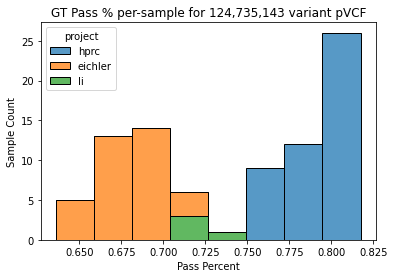

In [70]:
p = sb.histplot(data=gt_stats, x="Pass%", hue="project", multiple='stack')
hide = p.set(title=f"GT Pass % per-sample for {len(var_stats):,d} variant pVCF", 
             ylabel="Sample Count",
             xlabel="Pass Percent")

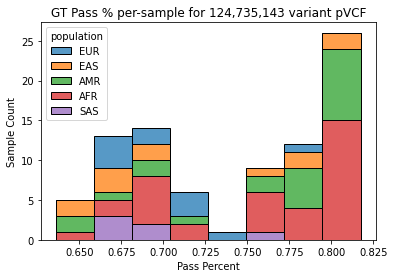

In [85]:
p = sb.histplot(data=gt_stats, x="Pass%", hue="population", multiple='stack')
hide = p.set(title=f"GT Pass % per-sample for {len(var_stats):,d} variant pVCF", 
             ylabel="Sample Count",
             xlabel="Pass Percent")

In [71]:
gt_stats['ratio'] = gt_stats['het_cnt'] / gt_stats['hom_cnt']

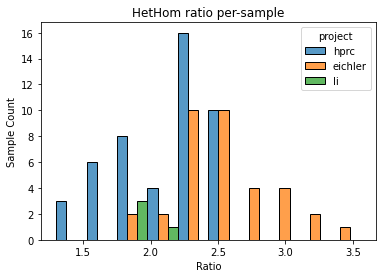

In [82]:
p = sb.histplot(data=gt_stats, x="ratio", hue="project", multiple='dodge')
hide = p.set(title=f"HetHom ratio per-sample", 
             ylabel="Sample Count",
             xlabel="Ratio")

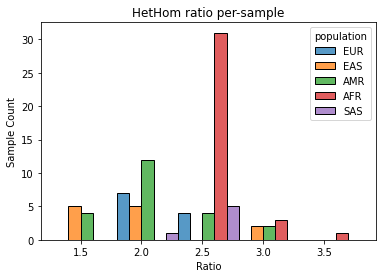

In [84]:
p = sb.histplot(data=gt_stats, x="ratio", hue="population", multiple='dodge', binwidth=0.5)
hide = p.set(title=f"HetHom ratio per-sample", 
             ylabel="Sample Count",
             xlabel="Ratio")

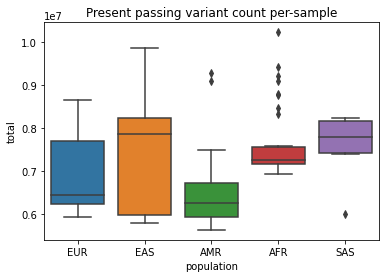

In [81]:
gt_stats['total'] = gt_stats['het_cnt'] + gt_stats['hom_cnt']
p = sb.boxplot(data=gt_stats, x="population", y="total")
hide = p.set(title="Present passing variant count per-sample")

In [151]:
gt_stats['total'].mean()

7259633.151162791

In [95]:
var_stats["szbin"] = var_stats['v_len'].apply(lambda x: truvari.get_sizebin(x))

In [97]:
tszbin = var_stats.groupby(['v_type' ,'szbin']).size()

In [98]:
tszbin.unstack()

szbin,>=5k,"[0,50)","[100,200)","[1k,2.5k)","[2.5k,5k)","[200,300)","[300,400)","[400,600)","[50,100)","[600,800)","[800,1k)"
v_type,,,,,,,,,,,
DEL,6079,6769940,35034,10431,4370,13339,11843,9301,59204,5091,3264
INS,28027,10790685,106734,73598,33331,54813,74899,47340,130510,33922,22823
SNP,0,106410565,0,0,0,0,0,0,0,0,0


In [99]:
plt_tzbin = tszbin.reset_index()

In [112]:
plt_tzbin.columns = ['VarType', 'SizeBin', 'Count']

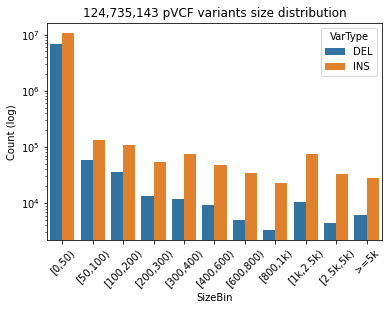

In [119]:
p = sb.barplot(data=plt_tzbin, x="SizeBin", y="Count", 
               hue="VarType", 
               order=truvari.SZBINS, 
               hue_order=["DEL", "INS"])
p.set(yscale='log', ylabel="Count (log)", title=f"{len(var_stats):,d} pVCF variants size distribution")
hide = plt.xticks(rotation=45)

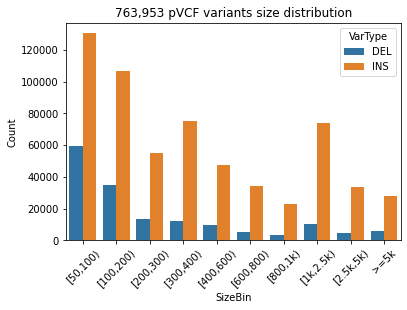

In [117]:
p = sb.barplot(data=plt_tzbin, x="SizeBin", y="Count", 
               hue="VarType", 
               order=truvari.SZBINS[1:], 
               hue_order=["DEL", "INS"])
p.set(title=f"{len(var_stats[var_stats['v_len'] >= 50]):,d} pVCF variants size distribution")
hide = plt.xticks(rotation=45)